# Download catalog

In [17]:
# https://www.gutenberg.org/cache/epub/feeds/pg_catalog.csv

In [26]:
import pandas as pd

books = pd.read_csv('data/pg_catalog.csv')
books

,Text#,Type,Issued,Title,Language,Authors,Subjects,LoCC,Bookshelves
0,1,Text,1971-12-01,The Declaration of Independence of the United ...,en,"Jefferson, Thomas, 1743-1826","United States -- History -- Revolution, 1775-1...",E201; JK,Politics; American Revolutionary War; United S...
1,2,Text,1972-12-01,The United States Bill of Rights\r\nThe Ten Or...,en,United States,Civil rights -- United States -- Sources; Unit...,JK; KF,Politics; American Revolutionary War; United S...
2,3,Text,1973-11-01,John F. Kennedy's Inaugural Address,en,"Kennedy, John F. (John Fitzgerald), 1917-1963",United States -- Foreign relations -- 1961-196...,E838,Browsing: History - American; Browsing: Politics
3,4,Text,1973-11-01,Lincoln's Gettysburg Address\r\nGiven November...,en,"Lincoln, Abraham, 1809-1865",Consecration of cemeteries -- Pennsylvania -- ...,E456,US Civil War; Browsing: History - American; Br...
4,5,Text,1975-12-01,The United States Constitution,en,United States,United States -- Politics and government -- 17...,JK; KF,United States; Politics; American Revolutionar...
...,...,...,...,...,...,...,...,...,...
74326,74492,Text,2024-09-28,Pyynikin ruoho,fi,"Pennanen, Ain'Elisabet, 1881-1945",NaN,NaN,NaN
74327,74493,Text,2024-09-28,Tapiolassa,fi,"Larin-Kyösti, 1873-1948",NaN,NaN,NaN
74328,74494,Text,2024-09-29,Helmet and Spear,en,"Church, Alfred John, 1829-1912",NaN,NaN,NaN
74329,74495,Text,2024-09-29,La bella Venere,fr,"Varlet, Théo, 1878-1938",NaN,NaN,NaN


In [27]:
# filter dataframe
books = books.loc[books.Language == 'en']
books = books.loc[~books.Bookshelves.isnull()]

In [28]:
# process bookshelves to get themes of books
books['Bookshelves'] = books['Bookshelves'].str.replace("Browsing:","")
books['Bookshelves'] = books['Bookshelves'].str.split(';')
books['Bookshelves'] = books['Bookshelves'].apply(lambda x : [a.strip() for a in x])


<BarContainer object of 20 artists>

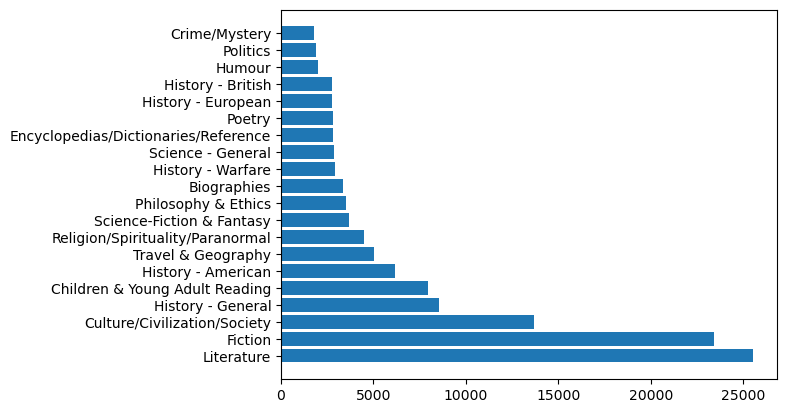

In [29]:
# show themes of books
import matplotlib.pyplot as plt
to_plot = books.loc[:,['Text#','Bookshelves']].explode('Bookshelves')['Bookshelves'].value_counts()[:20]
plt.barh(y=to_plot.index,width=to_plot)

In [30]:
# get ids of books given a "keyword"
keywords = ["Religion/Spirituality/Paranormal"]
books['match'] = books['Bookshelves'].apply(lambda x: a in " ".join(x) for a in keywords).sum(axis=1)
books_idxs = books.loc[books.match != 0]['Text#'].values
books_idxs.shape

(4479,)

In [31]:
books_2_use = books.loc[books['Text#'].isin(books_idxs)]
books_2_use.shape

(4479, 10)

In [32]:
# self written code

# from bs4 import BeautifulSoup

# books_2_use['summary'] = ""
# for idx in books_idxs:
#     html_link = f"https://www.gutenberg.org/ebooks/{idx}"

#     html_page = requests.get(html_link)
#     soup = BeautifulSoup(html_page.content, 'html.parser')

#     try:
#         summary = soup.find('th', text='Summary').find_next_sibling('td').get_text(strip=True)
#     except:
#         print(f"book { books_2_use.loc[books_2_use['Text#'] == idx, 'Title'] } doesn't have a summary")

#     books_2_use.loc[books_2_use['Text#'] == idx, 'summary'] = summary


# books_2_use.to_csv("data/summary_scrapped_travel_geography.csv")

In [33]:
# code asked to chatgtp
import requests
import pandas as pd
from bs4 import BeautifulSoup

all_books=list()

for idx in books_idxs:
    html_link = f"https://www.gutenberg.org/ebooks/{idx}"

    html_page = requests.get(html_link)
    html_content = html_page.content
    
    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")

    # Find the table with class 'bibrec'
    table = soup.find("table", class_="bibrec")

    # Initialize lists for column names and values
    data = dict()

    # Loop through all rows (tr elements) in the table
    try:
        all_tables = table.find_all("tr")
        for row in all_tables:

            # get available data from table
            try:
                th = row.find("th").get_text(strip=True)  # Column name
                td = row.find("td").get_text(strip=True)  # Corresponding value
            except:
                continue
            data[th] = td
    except:
        continue
        # make dictionnary
        
    all_books.append(data)
# Create a DataFrame using the column names and values


pd.DataFrame(all_books).to_csv("data/scrapped_guttenberg_religion_paranormal.csv")


access books at https://www.gutenberg.org/ebooks/{id}

In [16]:
pd.DataFrame(all_books)

,Author,Title,Credits,Summary,Language,LoC Class,Subject,Category,EBook-No.,Release Date,...,Creator,LoC No.,Compiler,Annotator,Other,Adapter,Engraver,Photographer,Publisher,Dubious author
0,United States. Central Intelligence Agency,The 1990 CIA World Factbook,Dr. Gregory B. Newby,"""The 1990 CIA World Factbook"" by the United St...",English,"G: Geography, Anthropology, Recreation","Political statistics -- Handbooks, manuals, etc.",Text,14,"Apr 1, 1991",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States. Central Intelligence Agency,The 1991 CIA World Factbook,Produced by Dr. Gregory B. Newby,"""The 1991 CIA World Factbook"" by the United St...",English,"G: Geography, Anthropology, Recreation","Political statistics -- Handbooks, manuals, etc.",Text,25,"Feb 1, 1992",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States. Central Intelligence Agency,The 1992 CIA World Factbook,Produced by Dr. Gregory B. Newby,"""The 1992 CIA World Factbook"" by the United St...",English,"G: Geography, Anthropology, Recreation","Political statistics -- Handbooks, manuals, etc.",Text,48,"Jan 1, 1993",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United States. Central Intelligence Agency,The 1993 CIA World Factbook,Produced by Dr. Gregory B. Newby,"""The 1993 CIA World Factbook"" by the United St...",English,"G: Geography, Anthropology, Recreation","Political statistics -- Handbooks, manuals, etc.",Text,87,"Oct 1, 1993",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Twain, Mark, 1835-1910",Tom Sawyer Abroad,An Anonymous Volunteer and David Widger,"""Tom Sawyer Abroad"" by Mark Twain is a novel w...",English,PS: Language and Literatures: American and Can...,Americans -- Foreign countries -- Fiction,Text,91,"Sep 14, 2004",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3423,"Robins, William",Paddington: Past and Present,Transcribed from the [1853] edition by David P...,"""Paddington: Past and Present"" by William Robi...",English,DA: History: General and Eastern Hemisphere: G...,"Paddington (London, England)",Text,51123,"Feb 3, 2016",...,NaN,02022365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3424,"Abrahams, Ethel Beatrice, 1881?-1956",Greek dress : a study of the costumes worn in...,"E-text prepared by deaurider, Ramon Pajares Bo...","""Greek Dress: A Study of the Costumes Worn in ...",English,"GT: Geography, Anthropology, Recreation: Manne...",Clothing and dress -- Greece,Text,51128,"Feb 5, 2016",...,NaN,09012608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3425,"Laing, John (Surgeon)",A voyage to Spitzbergencontaining an account o...,"Produced by Bryan Ness, Les Galloway and the O...","""A Voyage to Spitzbergen"" by John Laing is a h...",English,"G: Geography, Anthropology, Recreation",Shetland (Scotland) -- Description and travel,Text,51131,"Feb 5, 2016",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3426,"Baring-Gould, S. (Sabine), 1834-1924",A Book of DartmoorSecond Edition,"E-text prepared by Richard Tonsing, David Edwa...","""A Book of Dartmoor"" by S. Baring-Gould is an ...",English,DA: History: General and Eastern Hemisphere: G...,Dartmoor (England),Text,51134,"Feb 6, 2016",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
